## PCA and t-SNE

In this session, we will work on the image data of digits and will visualise them in two dimensional space using the techniques learned in the LVC 1.

- We will generate simple scatterplot to visualise our own implementation and will also look at the function from below link.

- The plot_embedding visualisation snippet has been taken from <a href = "https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py">here</a> - to generate the visualisations discussed in the LVC.


### Data

We will use the sklearn.datasets for this exercise and will only consider 6 classes. Note that the data is loaded as numpy arrays.

### Importing the libraries


In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold, datasets, decomposition

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

# Note the way data is loaded, we have used sklearn datasets for this purpose.

In [2]:
# Print the dimensions of the X.
X.shape

(1083, 64)

**Observations:** X has 1083 different images and each image is represented in 64 dimensions

In [4]:
# reducing the dimensions from 64 to 2 using different methods learned in LVC.

# t-SNE embedding of the digits dataset

print("Computing t-SNE embedding")
t0 = time()
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0) 
X_tsne = tsne.fit_transform(X)
t1 = time()
tsne_time = t1-t0
print("t-sne-Embeddings in time {}".format(tsne_time),"\n", X_tsne)
print("***************************************************")

# Projection on to the first 2 principal components using PCA

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.PCA(n_components=2).fit_transform(X)
t1 = time()
pca_time = t1-t0
print("pca projections in time {}".format(pca_time),"\n", X_pca)
print("***************************************************")

Computing t-SNE embedding
t-sne-Embeddings in time 3.4102251529693604 
 [[ 16.391212  -45.33681  ]
 [  5.513401   33.072216 ]
 [ -6.486735   29.378954 ]
 ...
 [ 31.360352    6.9738474]
 [ 35.26862     8.752878 ]
 [ 19.724216  -35.732067 ]]
***************************************************
Computing PCA projection
pca projections in time 0.003509044647216797 
 [[ 10.76255832 -24.73806961]
 [ -0.62690583  26.83049999]
 [  1.68580007  12.29145418]
 ...
 [ 30.84986547   6.30638443]
 [ 32.14391406  10.57477519]
 [ 16.46964942 -21.360137  ]]
***************************************************


**Observations:** Time taken to generate t-sne embeddings is very large as compared to the time taken by pca.

In [5]:
# Let's write a function to get a simple scatter plot for the generated embeddings
import seaborn as sns

def scatter(X, title = None):
  x1 = []
  x2 = []
  plt.figure(figsize = (10,10))
  plt.title(title)
  for i in X:
    x1.append(i[0])
    x2.append(i[1])
  sns.scatterplot(x = x1, y = x2)
  plt.show()

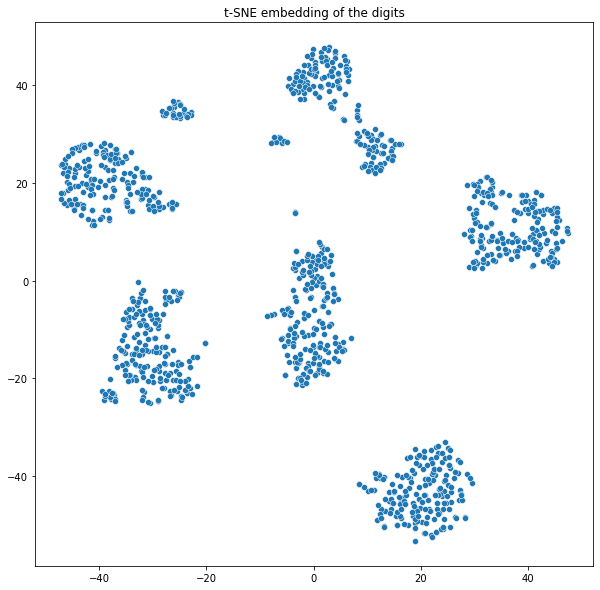

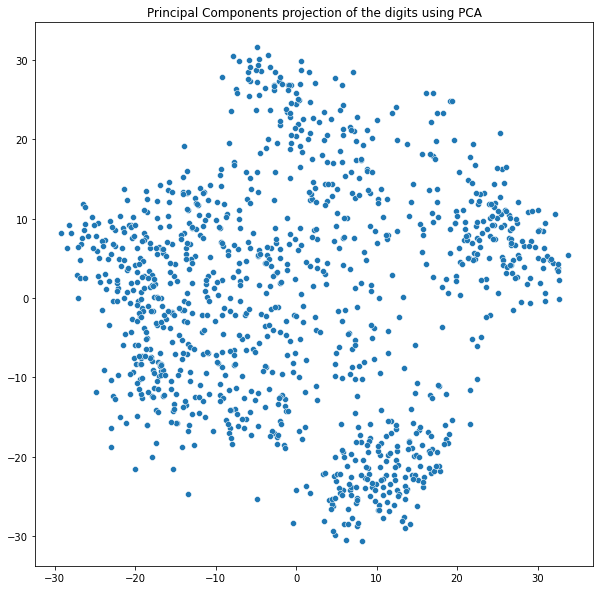

In [6]:
scatter(X_tsne, "t-SNE embedding of the digits")

scatter(X_pca, "Principal Components projection of the digits using PCA")

In [7]:
# Now,let us use the snippet from the above link to get to more advanced visualisation. 
# It is okay if you do not understand it fully. Just try to go through it.
# Note that the clusters would still appear the same but will be more informative


# Scale and visualize the embedding vectors

def plot_embedding(X, title=None):               # Passing the embedded array and the title of the graph
    print(X)                                        
    x_min, x_max = np.min(X, 0), np.max(X, 0)   # Finding the max and min of the passed array
    X = (X - x_min) / (x_max - x_min)           # Scaling the array, new values are between 0 and 1  

    plt.figure(figsize = (12,12))               # Set the figure size to a sufficiently large value             
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()


[[ 16.391212  -45.33681  ]
 [  5.513401   33.072216 ]
 [ -6.486735   29.378954 ]
 ...
 [ 31.360352    6.9738474]
 [ 35.26862     8.752878 ]
 [ 19.724216  -35.732067 ]]


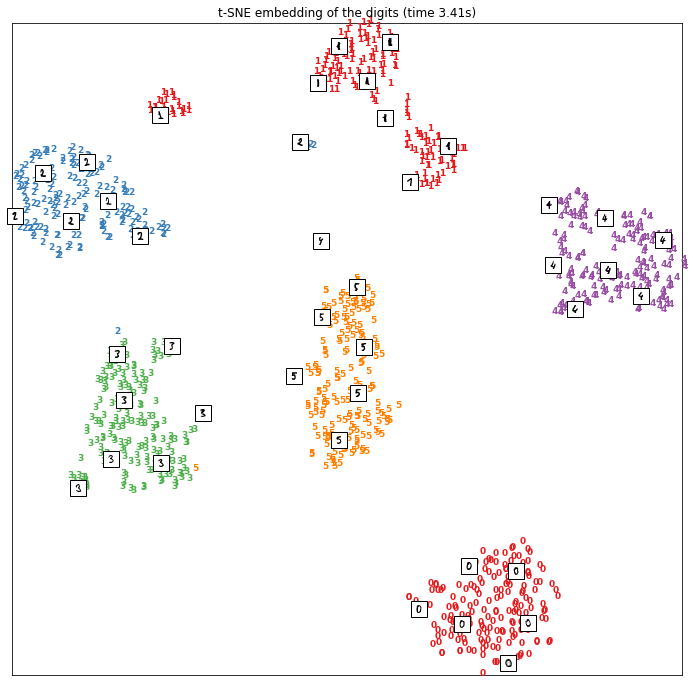

[[ 10.76255832 -24.73806961]
 [ -0.62690583  26.83049999]
 [  1.68580007  12.29145418]
 ...
 [ 30.84986547   6.30638443]
 [ 32.14391406  10.57477519]
 [ 16.46964942 -21.360137  ]]


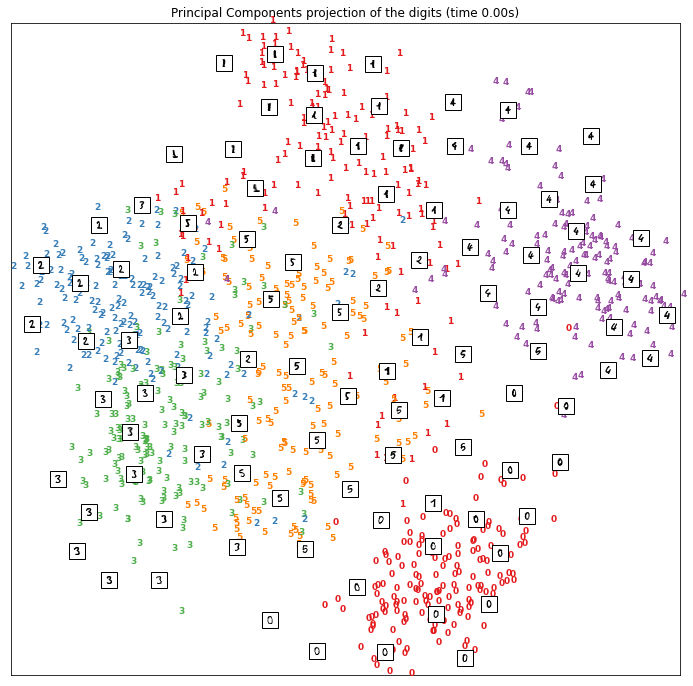

In [8]:
# plotting tsne embeddings 
plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (tsne_time))

# plotting pca
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (pca_time))

We reduced the dimensions of our dataset from 64 to 2 and plotted the 2D embeddings.

### Results
- Out of the two methods used above, t-SNE is the slowest in generating embeddings. 
- Out of the two methods, t-SNE visualization gives the best visualization.
- PCA is very fast as compared to t-SNE, but t-sne gives better visualization than PCA.

### Conclusion
- t-SNE gives good result but is very slow and can only be used on small datasets, whereas PCA is very fast and can be used on large dataset as well.